In [1]:
import ipywidgets as widgets
from ipywidgets import interact, interactive
import numpy as np
import random
from random import uniform
from math import sqrt
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

In [4]:
np.random.seed(10)

def f(x):
    if x:
        friendly_p.disabled = False
        friendly_p.value = 0.75
    else:
        friendly_p.disabled = True
        friendly_p.value = 0

class Agent:

    def __init__(self, a_type, tolerance_p, friendly, friendly_p, assimilation_p):
        self.a_type = a_type
        self.change_location()
        self.tol = round(uniform(0, 1), 4)
        self.fr = round(uniform(0, 1), 2)
        self.friendly = friendly
        self.assimilation = random.randint(0, 100)

    def change_location(self):
        self.location = round(uniform(0, 1),4), round(uniform(0, 1),4)

    def get_distance(self, other):
        a = (self.location[0] - other.location[0])**2
        b = (self.location[1] - other.location[1])**2
        return sqrt(a + b)

    def happy(self, agents):
        distances = []
        for agent in agents:
            if self != agent:
                distance = self.get_distance(agent)
                distances.append((distance, agent))
        distances.sort(key=lambda x: x[0])
        neighbors = [agent for d, agent in distances[:local_neighbors.value]]

        num_same_type = sum(self.a_type == agent.a_type for agent in neighbors)
        return num_same_type >= require_same_type.value

    def update(self, agents):
        while not self.happy(agents):
            if not self.friendly:
                if self.tol < tolerance_p.value and self.assimilation < assimilation_p.value:
                    self.change_location()
                elif self.tol < tolerance_p.value and self.assimilation > assimilation_p.value:
                    if self.a_type == 0 or self.a_type == 1:
                        self.a_type = 2
                        return
                    elif self.a_type == 1 or self.a_type == 2:
                        self.a_type = 0
                        return
                    else:
                        self.a_type = 1
                        return
                elif self.tol > tolerance_p.value and self.assimilation < assimilation_p.value:
                    self.change_location()
                else:
                    return
            else:
                if self.tol < tolerance_p.value and self.fr > friendly_p.value and self.assimilation < assimilation_p.value:
                    self.change_location()
                elif self.tol < tolerance_p.value and self.fr > friendly_p.value and self.assimilation > assimilation_p.value:
                    if self.a_type == 0 or self.a_type == 1:
                        self.a_type = 2
                        return
                    elif self.a_type == 1 or self.a_type == 2:
                        self.a_type = 0
                        return
                    else:
                        self.a_type = 1
                        return
            
                elif self.tol > tolerance_p.value and self.fr > friendly_p.value and self.assimilation > assimilation_p.value:
                    if self.a_type == 0 or self.a_type == 1:
                        self.a_type = 2
                        return
                    elif self.a_type == 1 or self.a_type == 2:
                        self.a_type = 0
                        return
                    else:
                        self.a_type = 1
                        return
                elif self.tol > tolerance_p.value and self.fr > friendly_p.value and self.assimilation < assimilation_p.value:
                    self.change_location()
                elif self.tol < tolerance_p.value and self.fr < friendly_p.value and self.assimilation < assimilation_p.value:
                    self.change_location()
                elif self.tol < tolerance_p.value and self.fr < friendly_p.value and self.assimilation > assimilation_p.value:
                    self.change_location()    
                elif self.tol > tolerance_p.value and self.fr < friendly_p.value and self.assimilation > assimilation_p.value:
                    if self.a_type == 0 or self.a_type == 1:
                        self.a_type = 2
                        return
                    elif self.a_type == 1 or self.a_type == 2:
                        self.a_type = 0
                        return
                    else:
                        self.a_type = 1
                        return
                elif self.tol > tolerance_p.value and self.fr < friendly_p.value and self.assimilation < assimilation_p.value:
                    self.change_location()
                else:
                    return
                    
def plot_distribution(agents, cycle_num):
    x_values_0, y_values_0 = [], []
    x_values_1, y_values_1 = [], []
    x_values_2, y_values_2 = [], []
    for agent in agents:
        x, y = agent.location
        if agent.a_type == 0:
            x_values_0.append(x)
            y_values_0.append(y)
        elif agent.a_type ==1:
            x_values_1.append(x)
            y_values_1.append(y)
        else:
            x_values_2.append(x)
            y_values_2.append(y)
    fig, ax = plt.subplots(figsize=(8, 8))
    plot_args = {'markersize': 8, 'alpha': 1}
    ax.set_facecolor('white')
    ax.plot(x_values_0, y_values_0, 'o', markerfacecolor='black', **plot_args)
    ax.plot(x_values_1, y_values_1, 'o', markerfacecolor='yellow', **plot_args)
    ax.plot(x_values_2, y_values_2, 'o', markerfacecolor='lime', **plot_args)
    ax.set_title(f'Iteration {cycle_num-1}')
    plt.show()

def function():
    agents = [Agent(0, tolerance_p.value, True, friendly_p.value, assimilation_p.value) for i in range(number_of_type0.value)]
    agents.extend(Agent(1, tolerance_p.value, False, friendly_p.value, assimilation_p.value) for i in range(number_of_type1.value))
    agents.extend(Agent(2, tolerance_p.value, True, friendly_p.value, assimilation_p.value) for i in range(number_of_type2.value))
    
    count = 1
    while True:
        plot_distribution(agents, count)
        count += 1
        no_one_moved = True
        for agent in agents:
            old_location = agent.location
            agent.update(agents)
            if agent.location != old_location:
                no_one_moved = False
        if no_one_moved:
            break

IntText(value=450, description='Type 0')

IntText(value=250, description='Type 1')

IntText(value=300, description='Type 2')

IntSlider(value=7, continuous_update=False, description='Neighbor', max=10)

IntSlider(value=5, continuous_update=False, description='Same type', max=10)

FloatSlider(value=0.7, continuous_update=False, description='Tolerance', max=1.0, step=0.01)

interactive(children=(Checkbox(value=False, description='Friendly'), Output()), _dom_classes=('widget-interact…

FloatSlider(value=0.0, continuous_update=False, description='Friendly', disabled=True, max=1.0, step=0.01)

IntSlider(value=30, continuous_update=False, description='Assimilation')

Button(button_style='info', description='Simulate', style=ButtonStyle())

Output()

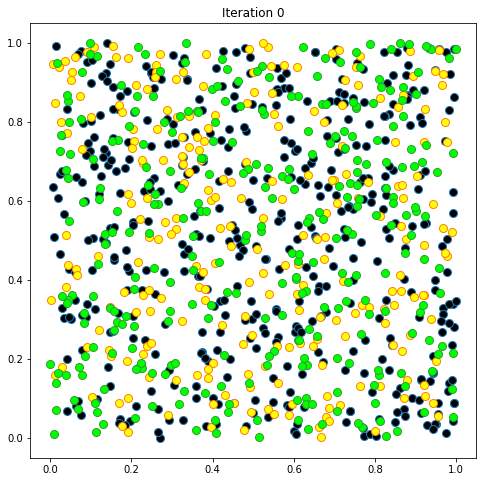

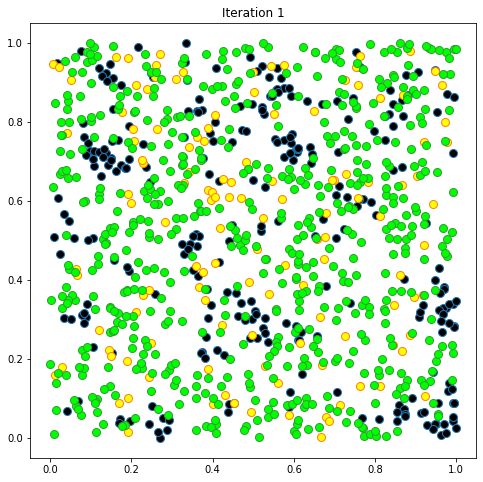

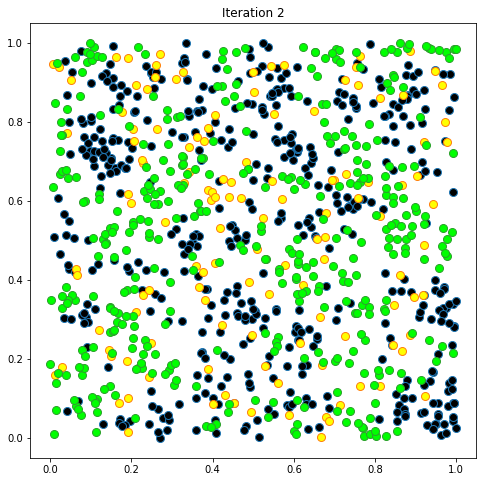

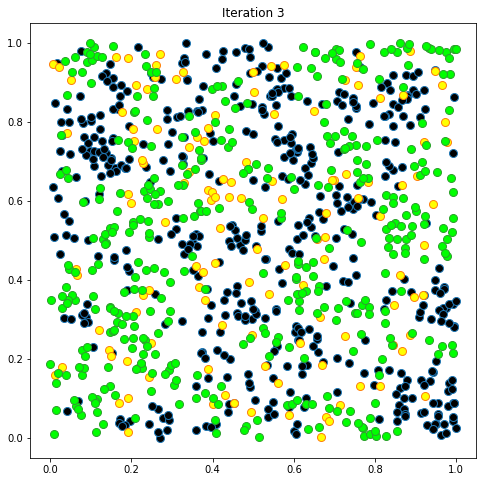

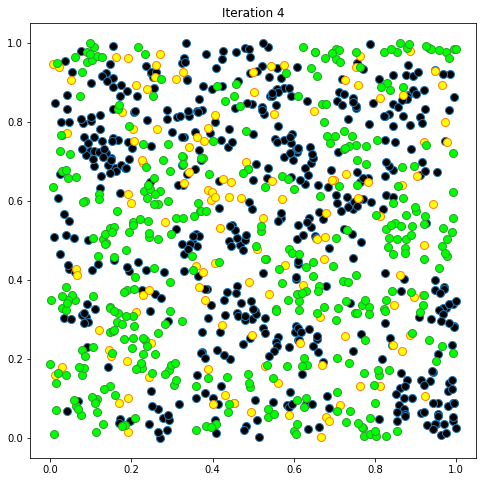

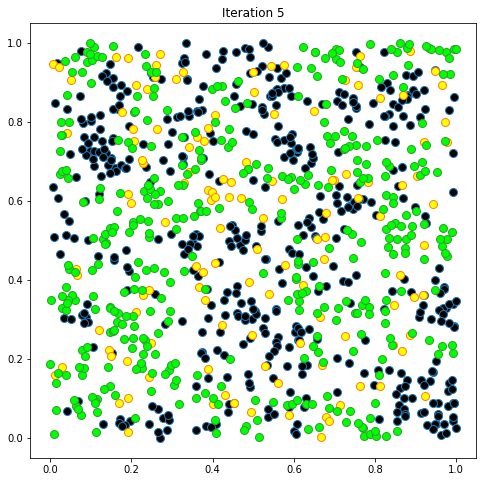

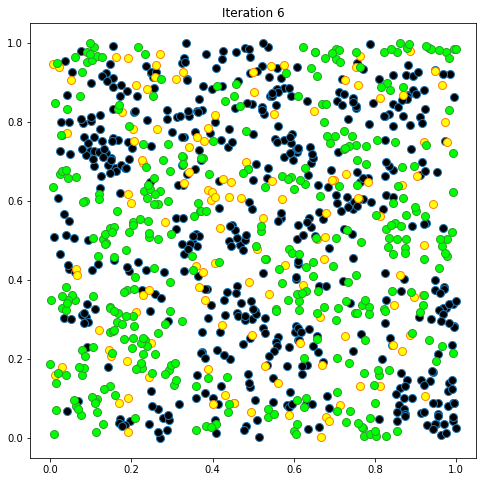

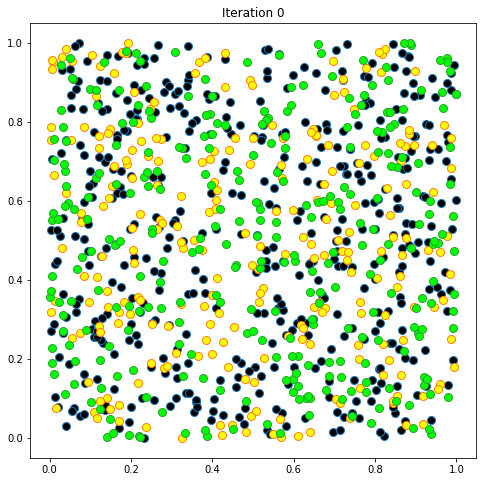

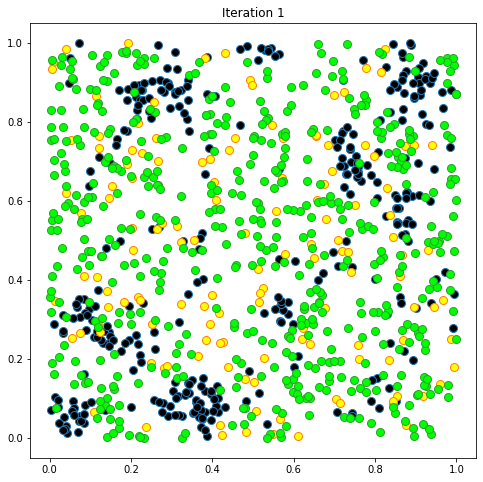

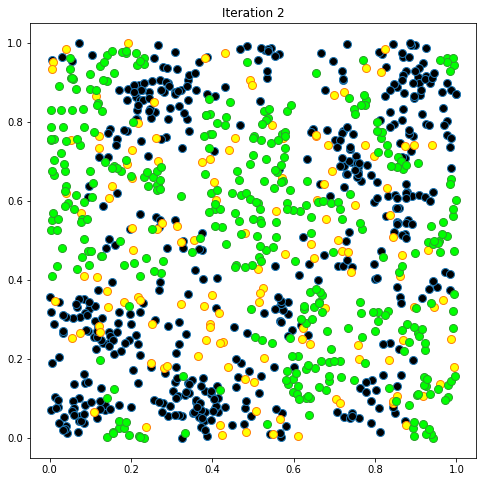

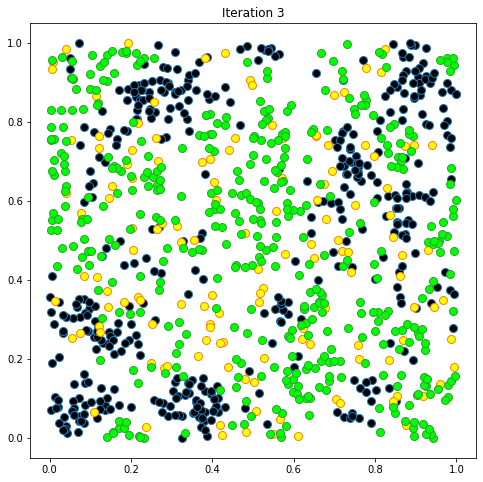

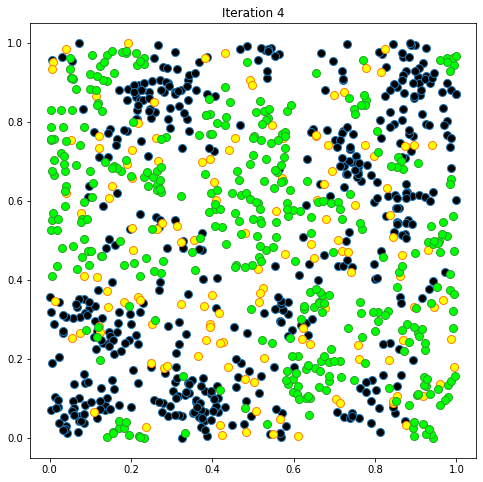

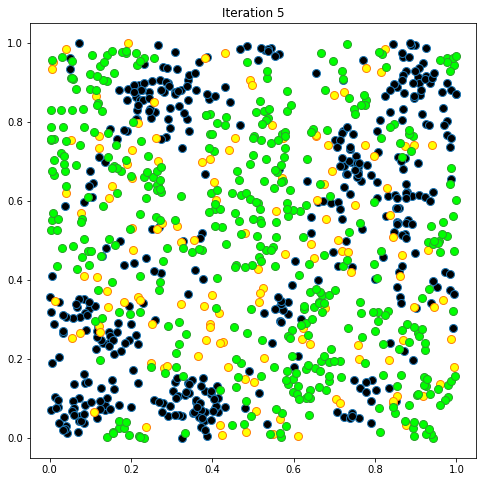

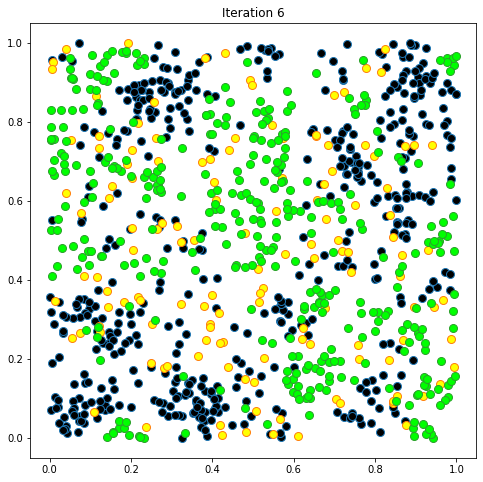

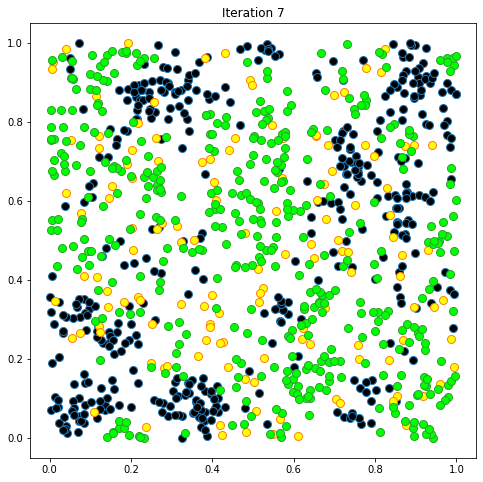

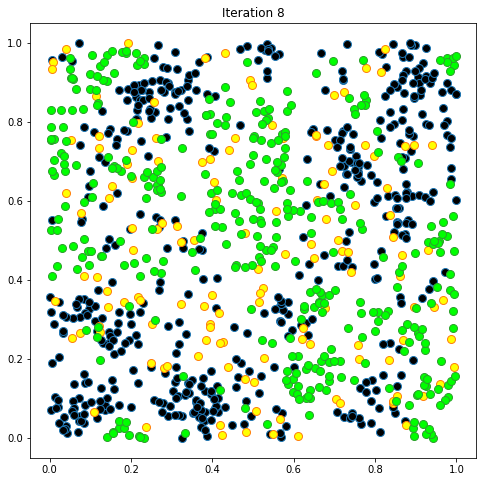

In [5]:
#количество агентов типа 0
number_of_type0 = widgets.IntText(
    value = 450,
    description="Type 0")
display(number_of_type0)

#количество агентов типа 1
number_of_type1 = widgets.IntText(
    value = 250,
    description="Type 1")
display(number_of_type1)

#количество агентов типа 2
number_of_type2 = widgets.IntText(
    value = 300,
    description="Type 2")
display(number_of_type2)

#количество соседей
local_neighbors = widgets.IntSlider(
    value=7,
    min=0,
    max=10,
    step=1,
    description='Neighbor',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
display(local_neighbors)

#reqires same time
require_same_type = widgets.IntSlider(
    value=5,
    min=0,
    max=10,
    step=1,
    description='Same type',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
display(require_same_type)

#процент толерантности
tolerance_p = widgets.FloatSlider(
    value=0.7,
    min=0,
    max=1.0,
    step=0.01,
    description='Tolerance',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
)
display(tolerance_p)

#use friendly

interact(f, x=widgets.Checkbox(description='Friendly',disabled=False))

#процент дружелюбности
friendly_p = widgets.FloatSlider(
    value=0,
    min=0,
    max=1.0,
    step=0.01,
    description='Friendly',
    disabled=True,
    continuous_update=False,
    orientation='horizontal',
)
display(friendly_p)

#процент ассимиляции
assimilation_p = widgets.IntSlider(
    value=30,
    min=0,
    max=100,
    step=1,
    description='Assimilation',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
display(assimilation_p)



button = widgets.Button(description="Simulate", button_style='info')
output = widgets.Output()

display(button, output)

def on_button_clicked(a):
    function()

button.on_click(on_button_clicked)